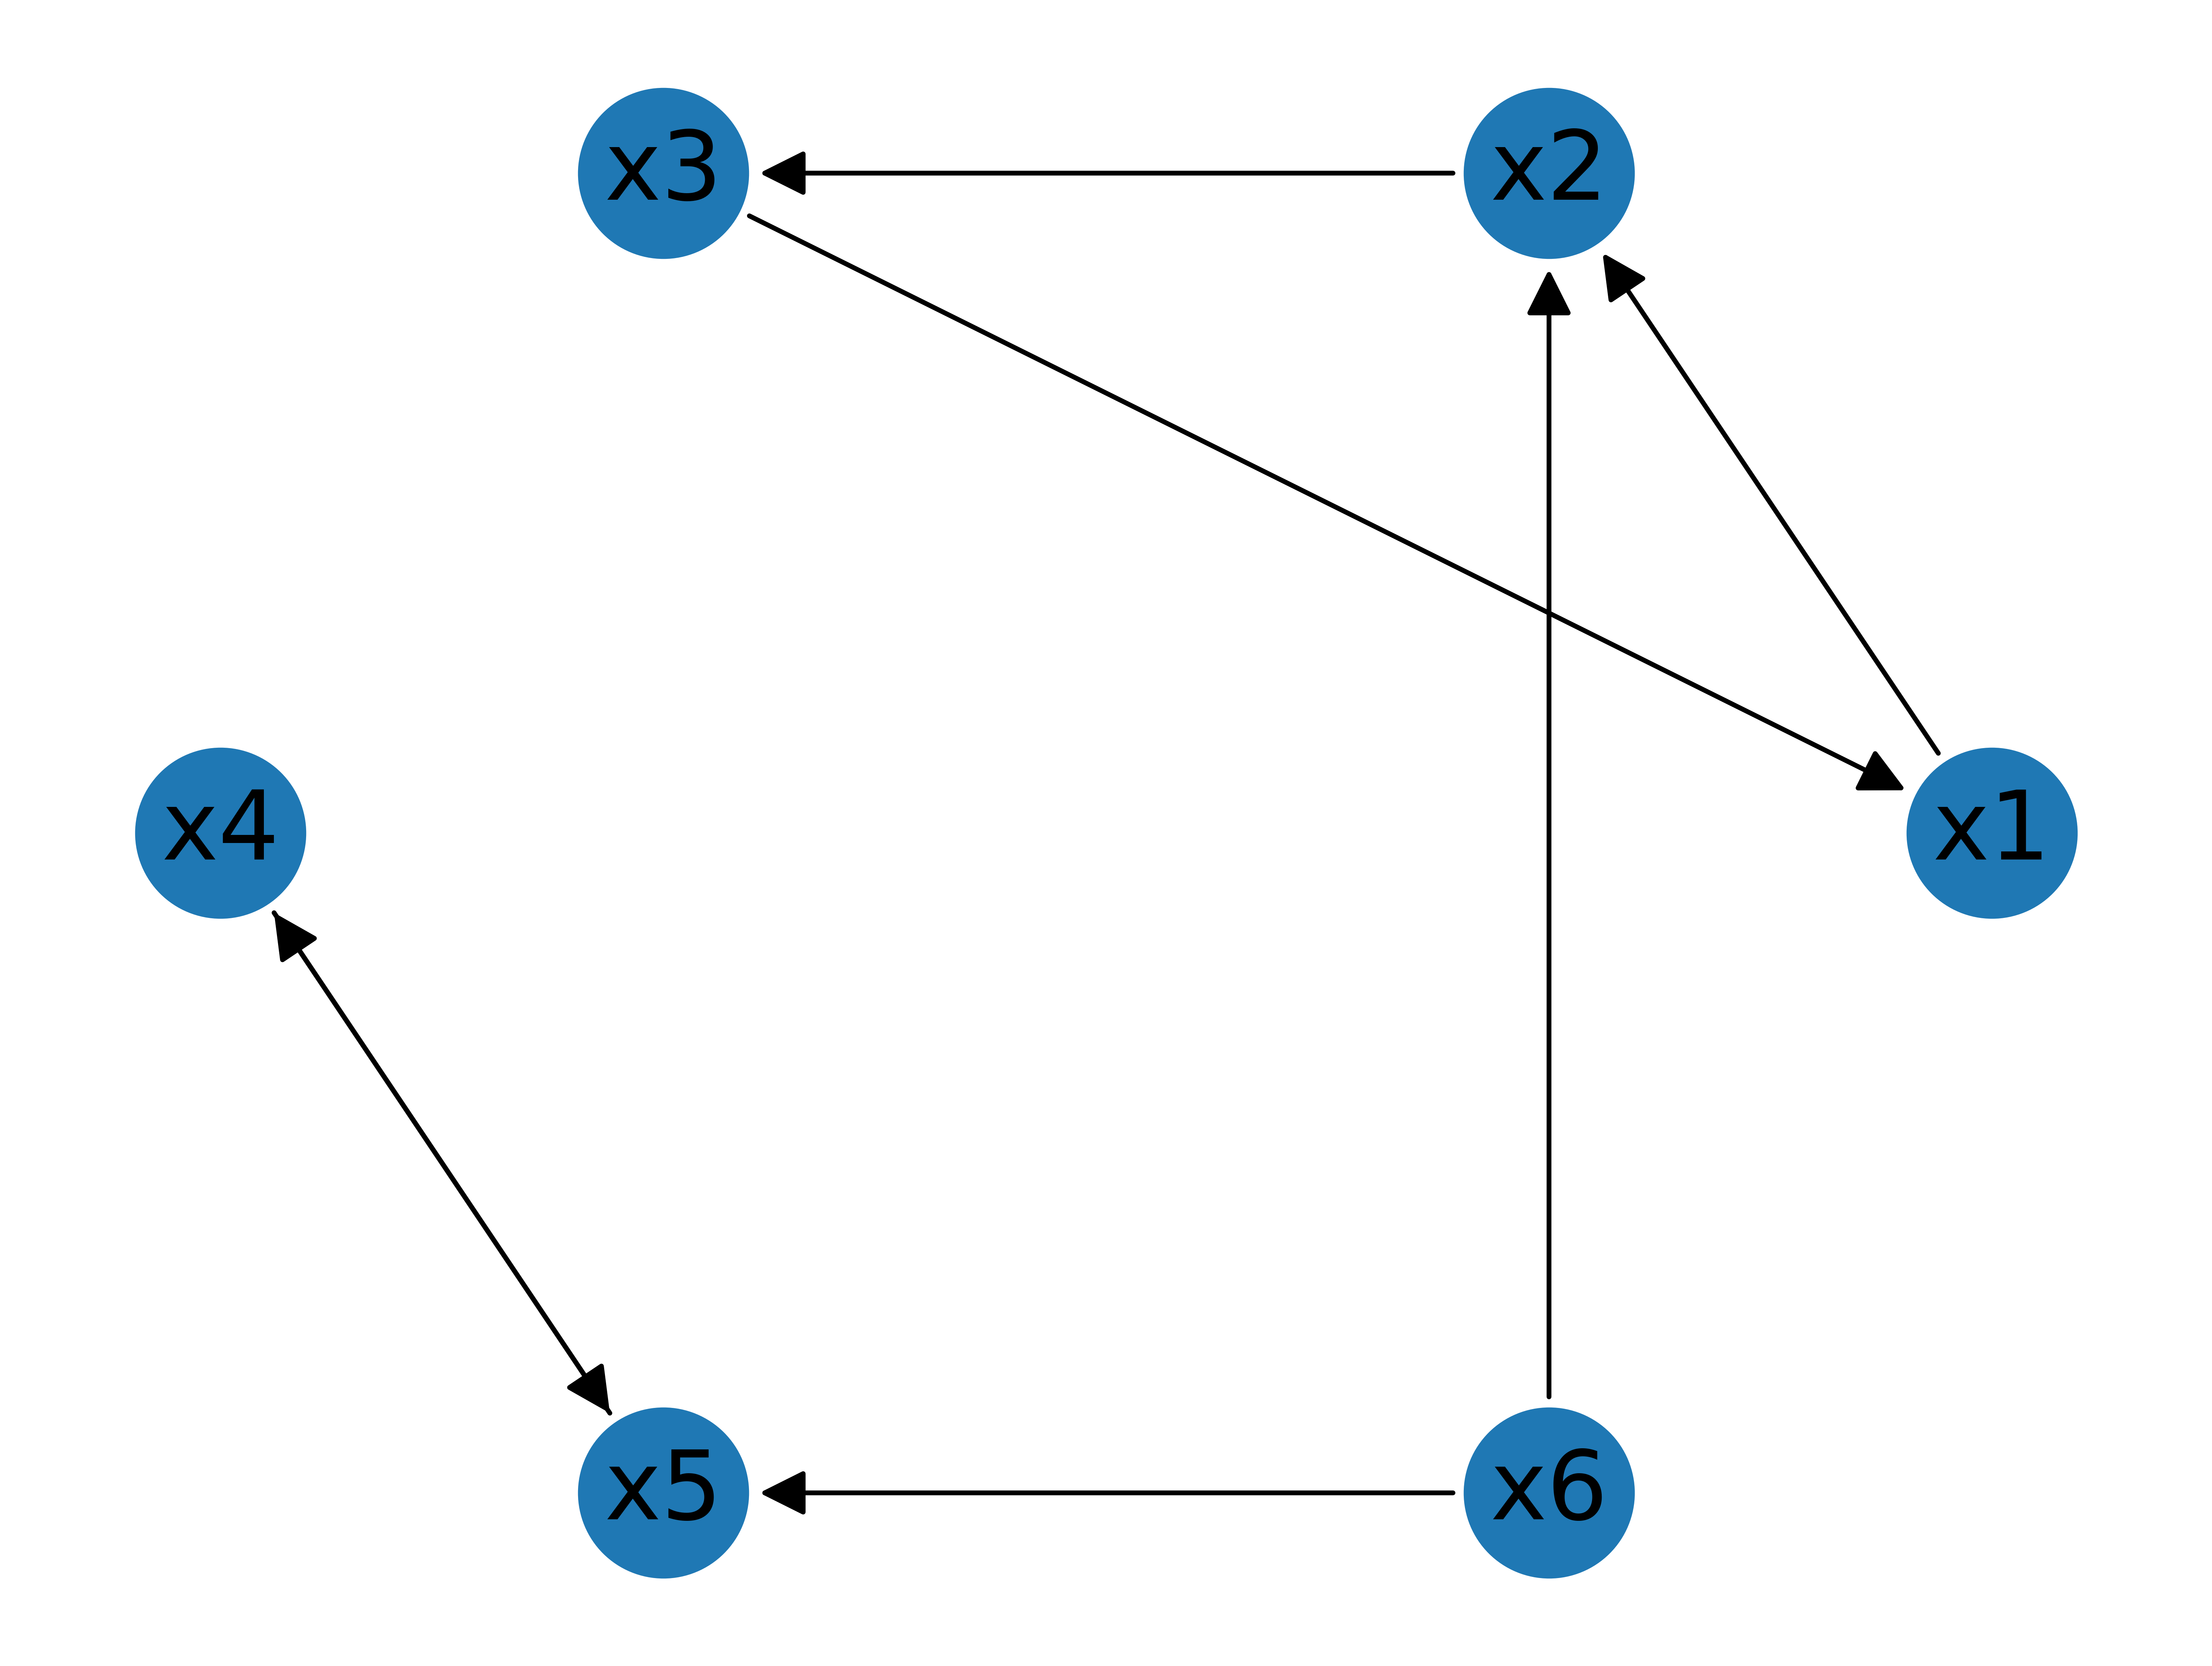

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
G.add_nodes_from(nodes)

edges = [
    ('x3', 'x1'),  # x1(t+1) = 0.1 - 0.6x3(t) + u1(t+1)
    ('x1', 'x2'),  # x2(t+1) = 0.7 - 0.5x1(t) + 0.8x6(t) + u2(t+1)
    ('x6', 'x2'),  # 
    ('x2', 'x3'),  # x3(t+1) = 0.5 + 0.7x2(t) + u3(t+1)
    ('x5', 'x4'),  # 
    ('x4', 'x5'),  # x5(t+1) = 0.8 + 0.2x4(t) + 0.7x6(t) + u5(t+1)
    ('x6', 'x5'),  # 
]



G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(8, 6), dpi=900)
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=1200)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20,min_source_margin=20, min_target_margin=20)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# plt.title('Causal Structure of the System')
plt.axis('off')  # Turn off the axis
plt.show()


0.4806508892100596


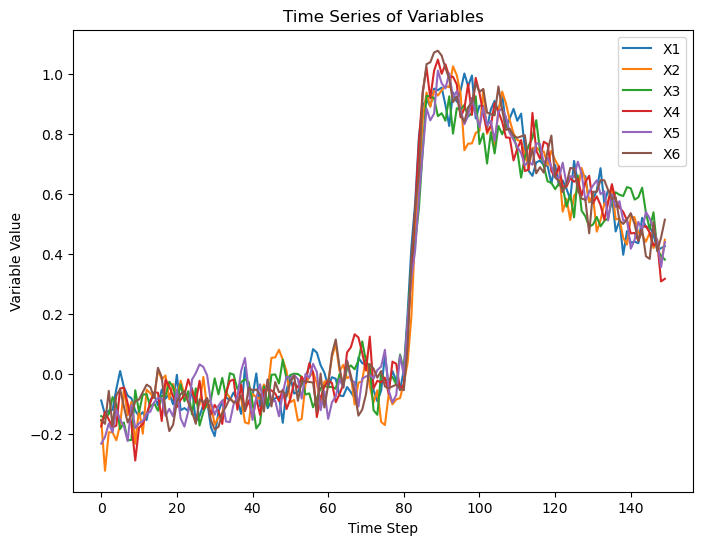

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import syth_ana_functions as saf

length=1500
delta=10

t0=800.0
dt=56.32925780771254
dy=1
GS_slope=0.00016431508734689263
GIS_slope=-0.0009404944834246113
tau=13.649751415738818
sigma=0.05


time = np.arange(length, step=delta, dtype='float')

X1 = np.zeros(len(time))
X2 = np.zeros(len(time))
X3= np.zeros(len(time))
X4= np.zeros(len(time))
X5= np.zeros(len(time))
X6= np.zeros(len(time))

X1[0] = np.random.normal(0, sigma)
X2[0] = np.random.normal(0, sigma)
X3[0] = np.random.normal(0, sigma)
X4[0] = np.random.normal(0, sigma)
X5[0] = np.random.normal(0, sigma)
X6[0] = np.random.normal(0, sigma)

alpha = np.exp(-delta / tau)
print(alpha)




for t in range(1, len(time)):
    X1[t] = alpha*X1[t-1] + 6e-2*X3[t-1]+np.random.normal(0, sigma)
    X2[t] = alpha*X2[t-1] + 5e-2*X1[t-1]+8e-2*X6[t-1]+np.random.normal(0, sigma)
    X3[t] = alpha*X3[t-1] + 7e-2*X2[t-1]+np.random.normal(0, sigma)
    X4[t] = alpha*X4[t-1] + 4e-2*X5[t-1]+np.random.normal(0, sigma)
    X5[t] = alpha*X5[t-1] + 2e-2*X4[t-1]+7e-2*X6[t-1]+np.random.normal(0, sigma)
    X6[t] = alpha*X6[t-1] + np.random.normal(0, sigma)



        
synt_trans= saf.linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)

lag=-1
# Shift the series
if lag > 0:
    shifted_synt_trans = np.full_like(synt_trans, np.nan)
    shifted_synt_trans[:-lag] = synt_trans[lag:]
if lag < 0:
    shifted_synt_trans = np.full_like(synt_trans, np.nan)
    shifted_synt_trans[-lag:] = synt_trans[:lag]
if lag == 0:
    shifted_synt_trans=synt_trans

X1=X1+synt_trans
X2=X2+synt_trans
X3=X3+synt_trans
X4=X4+synt_trans
X5=X5+synt_trans
X6=X6+synt_trans



# Plotting
plt.figure(figsize=(8, 6))
plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(X3, label='X3')
plt.plot(X4, label='X4')
plt.plot(X5, label='X5')
plt.plot(X6, label='X6')
plt.xlabel('Time Step')
plt.ylabel('Variable Value')
plt.title('Time Series of Variables')
plt.legend()
plt.show()

In [2]:
# store the data to a dataframe
import pandas as pd

data = {'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6}
data = pd.DataFrame(data)
# drop nan values
data = data.dropna()
data

,X1,X2,X3,X4,X5,X6
0,-0.089553,-0.154479,-0.141450,-0.175941,-0.233167,-0.154838
1,-0.136491,-0.323563,-0.149145,-0.126802,-0.211387,-0.167302
2,-0.123806,-0.195436,-0.135104,-0.152849,-0.166206,-0.057588
3,-0.121044,-0.195605,-0.078137,-0.179045,-0.195283,-0.174738
4,-0.051207,-0.222108,-0.101883,-0.173228,-0.119097,-0.072224
...,...,...,...,...,...,...
145,0.488343,0.469506,0.481596,0.469793,0.517105,0.382395
146,0.464442,0.418648,0.537784,0.426660,0.483361,0.504642
147,0.410813,0.447145,0.412446,0.437687,0.441285,0.408218
148,0.418292,0.362122,0.393204,0.307339,0.354794,0.453393


In [3]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_sta=GC.make_stationary(data,['X1', 'X2','X3','X4','X5','X6'], test_method='ADF',plot=False)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X1 has 5 link(s):
    [pc_alpha = 0.5]
        (X3 -1): max_pval = 0.01461, |min_val| =  0.204
        (X4 -1): max_pval = 0.09293, |min_val| =  0.142
        (X6 -1): max_pval = 0.20180, |min_val| =  0.108
        (X3 -2): max_pval = 0.28653, |min_val| =  0.090
        (X1 -1): max_pval = 0.48831, |min_val| =  0.058

    Variable X2 has 5 link(s):
    [pc_alpha = 0.1]
        (X6 -1): max_pval = 0.00566, |min_val| =  0.232
        (X2 -2): max_pval = 0.05415, |min_val| =  0.163
        (X4 -2): max_pval = 0.06397, |min_val| =  0.156
        (X1 -1): max_pval = 0.07936, |min_val| =  0.148
        (X4 -1): max_pval = 0.09606, |min_val| =  0.141

    Variable X3 has 4 link(s):
    [pc_alpha = 0.2]
        (X1 -1): max_pv

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

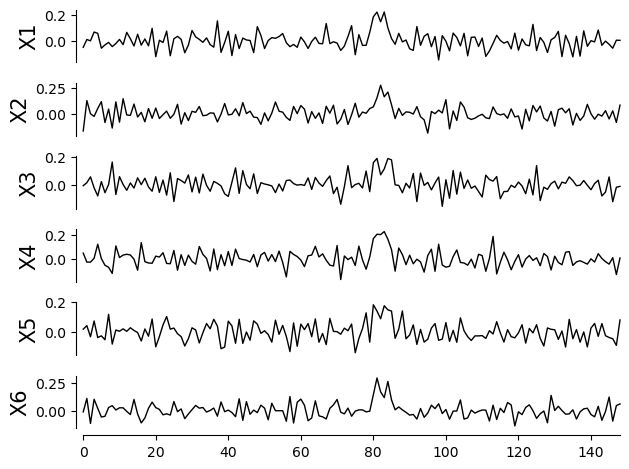

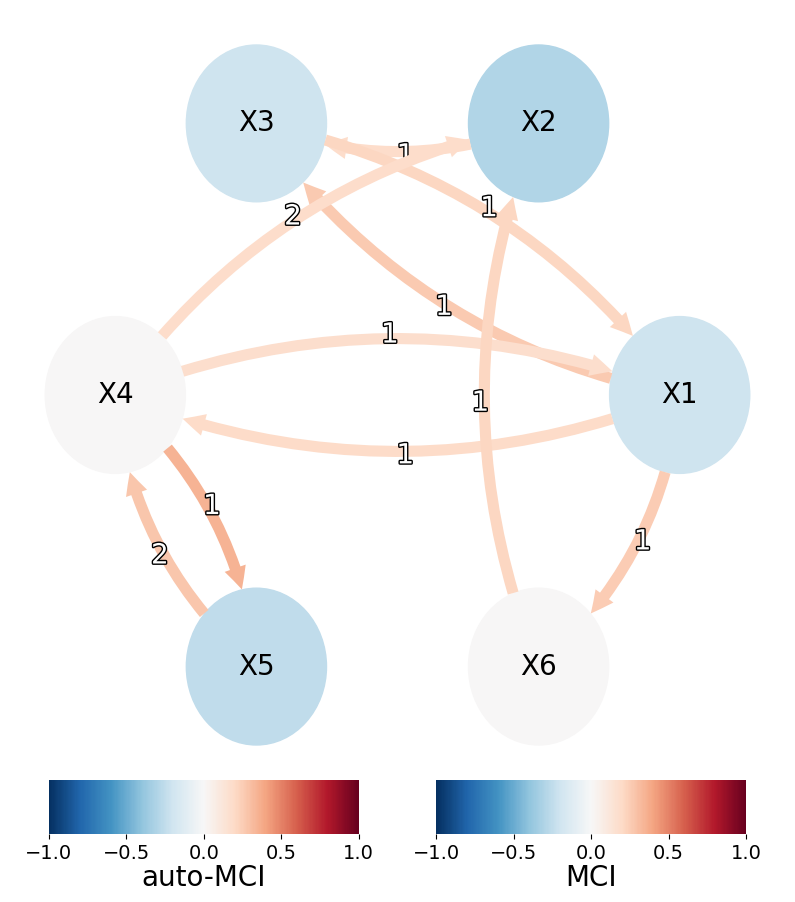

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn


# get the column of A and B from the dataframe and convert to numpy array
array = df_sta[['X1', 'X2','X3','X4','X5','X6']].values

var_names=['X1', 'X2','X3','X4','X5','X6']
# Create a Tigramite DataFrame object
dataframe_sta = pp.DataFrame(array,
                         datatime=np.arange(len(array)),
                         var_names=var_names)

tp.plot_timeseries(dataframe_sta,label_fontsize=15,tick_label_size=10)


ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe_sta,
    cond_ind_test=ParCorr,
    verbosity=1)

pcmci.verbosity = 1
tau_max=2
results = pcmci.run_pcmci(tau_min=1, tau_max=tau_max, pc_alpha=None)
# q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
    )

# For sliding window


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable 0 has 1 link(s):
    [pc_alpha = 0.05]
        (0 -1): max_pval = 0.00329, |min_val| =  0.424

    Variable 1 has 4 link(s):
    [pc_alpha = 0.5]
        (1 -1): max_pval = 0.00098, |min_val| =  0.470
        (5 -1): max_pval = 0.01560, |min_val| =  0.355
        (0 -2): max_pval = 0.28908, |min_val| =  0.160
        (3 -2): max_pval = 0.43518, |min_val| =  0.118

    Variable 2 has 1 link(s):
    [pc_alpha = 0.05]
        (2 -1): max_pval = 0.00090, |min_val| =  0.473

    Variable 3 has 2 link(s):
    [pc_alpha = 0.05]
        (3 -1): max_pval = 0.01097, |min_val| =  0.372
        (5 -2): max_pval = 0.01873, |min_val| =  0.345

    Variable 4 has 4 link(s):
    [pc_alpha = 0.5]
        (0 -2): max_pval = 0.03820, |mi

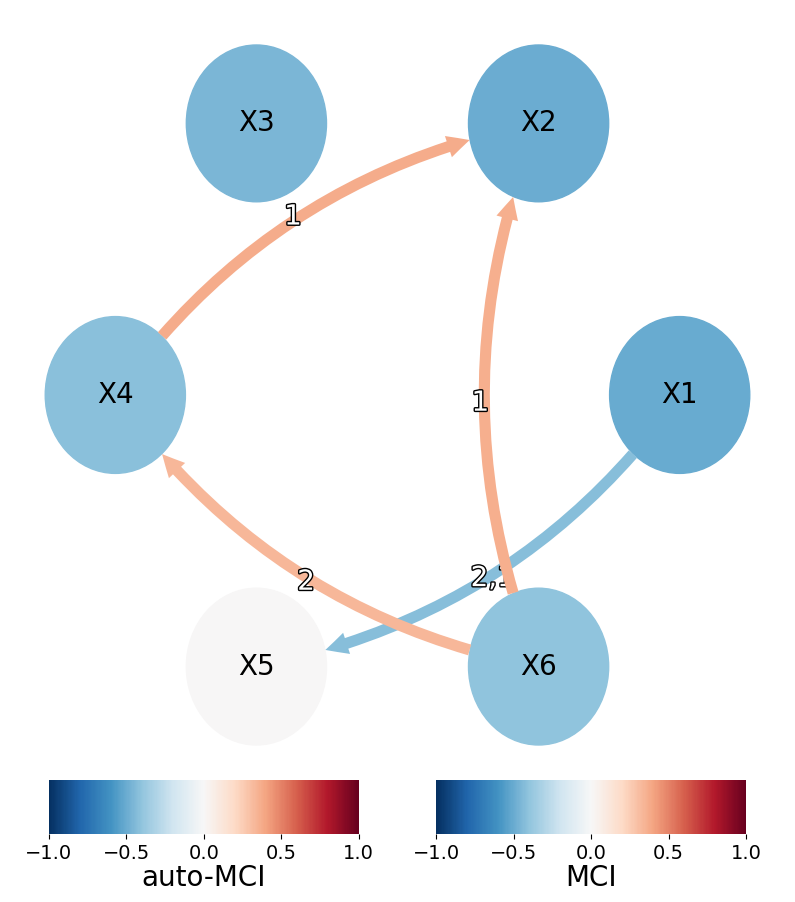


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable 0 has 4 link(s):
    [pc_alpha = 0.3]
        (5 -2): max_pval = 0.06375, |min_val| =  0.276
        (0 -1): max_pval = 0.08870, |min_val| =  0.254
        (0 -2): max_pval = 0.21119, |min_val| =  0.188
        (2 -1): max_pval = 0.26793, |min_val| =  0.173

    Variable 1 has 3 link(s):
    [pc_alpha = 0.05]
        (5 -2): max_pval = 0.02521, |min_val| =  0.333
        (4 -2): max_pval = 0.04609, |min_val| =  0.299
        (0 -2): max_pval = 0.04914, |min_val| =  0.295

    Variable 2 has 2 link(s):
    [pc_alpha = 0.3]
        (2 -1): max_pval = 0.14140, |min_val| =  0.223
        (5 -1): max_pval = 0.25128, |min_val| =  0.177

    Variable 3 has 2 link(s):
    [pc_alpha = 0.1]
        (3 -1): max_pval = 0.01723, |m

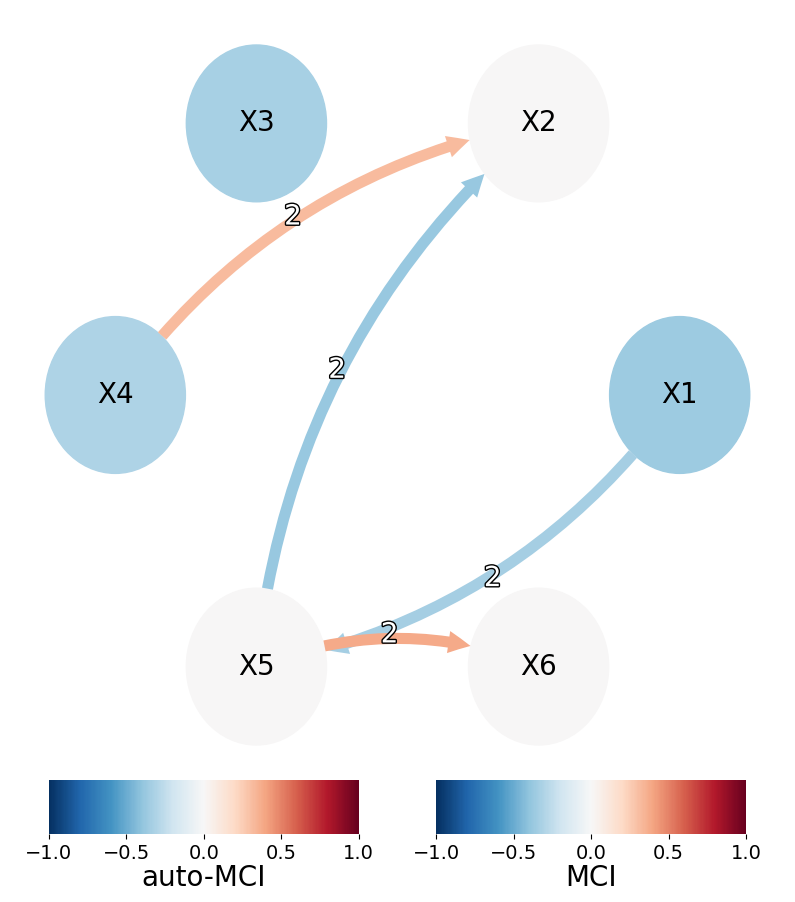


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable 0 has 2 link(s):
    [pc_alpha = 0.2]
        (3 -1): max_pval = 0.09000, |min_val| =  0.257
        (2 -1): max_pval = 0.16459, |min_val| =  0.213

    Variable 1 has 2 link(s):
    [pc_alpha = 0.05]
        (0 -1): max_pval = 0.00982, |min_val| =  0.381
        (5 -1): max_pval = 0.02668, |min_val| =  0.330

    Variable 2 has 2 link(s):
    [pc_alpha = 0.05]
        (0 -1): max_pval = 0.00144, |min_val| =  0.461
        (1 -1): max_pval = 0.02261, |min_val| =  0.339

    Variable 3 has 2 link(s):
    [pc_alpha = 0.05]
        (0 -1): max_pval = 0.00845, |min_val| =  0.388
        (4 -2): max_pval = 0.01770, |min_val| =  0.352

    Variable 4 has 3 link(s):
    [pc_alpha = 0.3]
        (0 -1): max_pval = 0.15568, |mi

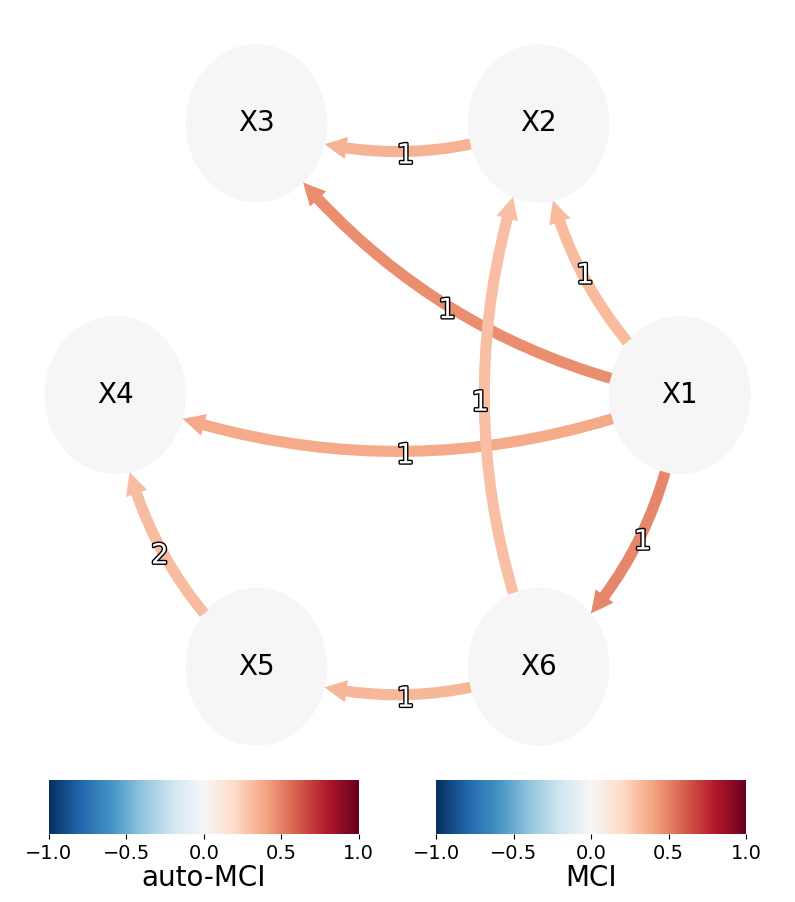


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable 0 has 3 link(s):
    [pc_alpha = 0.4]
        (2 -1): max_pval = 0.27790, |min_val| =  0.165
        (3 -1): max_pval = 0.29656, |min_val| =  0.161
        (2 -2): max_pval = 0.37397, |min_val| =  0.137

    Variable 1 has 3 link(s):
    [pc_alpha = 0.2]
        (3 -2): max_pval = 0.09667, |min_val| =  0.257
        (0 -1): max_pval = 0.14025, |min_val| =  0.229
        (3 -1): max_pval = 0.16319, |min_val| =  0.216

    Variable 2 has 3 link(s):
    [pc_alpha = 0.3]
        (0 -1): max_pval = 0.02591, |min_val| =  0.340
        (3 -1): max_pval = 0.18598, |min_val| =  0.206
        (1 -2): max_pval = 0.22425, |min_val| =  0.189

    Variable 3 has 4 link(s):
    [pc_alpha = 0.5]
        (0 -1): max_pval = 0.00269, |mi

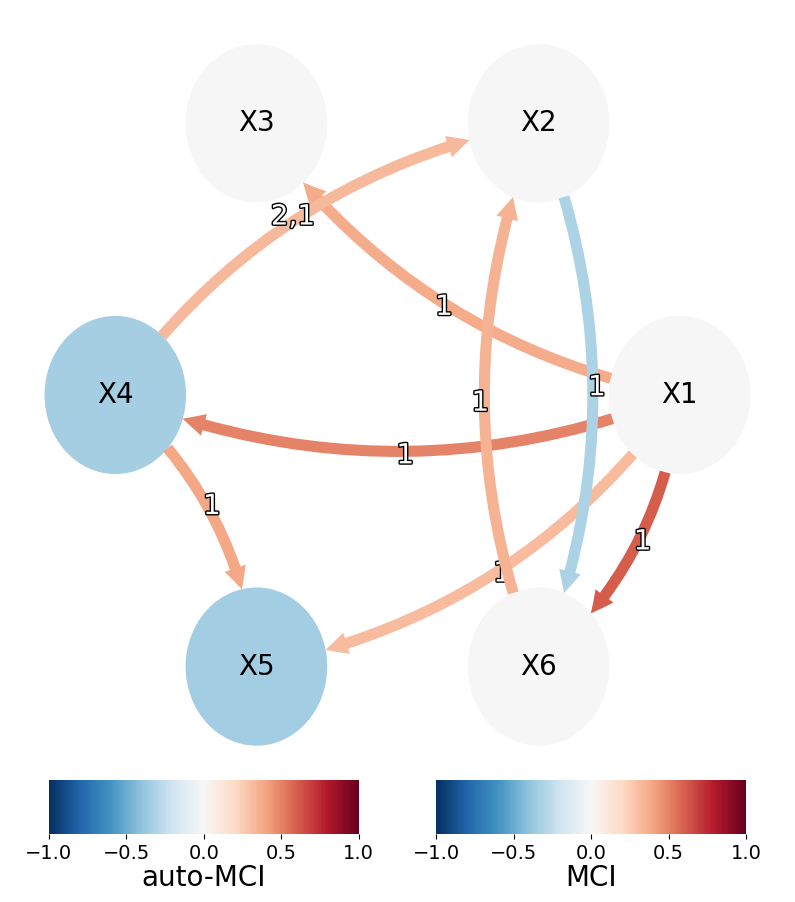

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr

def sliding_window_analysis(data, window_length=50, overlap=25):
    n_steps = len(data)
    start = 0
    results_list = []
    
    while start + window_length <= n_steps:
        window_data = data[start:start + window_length]
        dataframe = pp.DataFrame(window_data, datatime=np.arange(window_length))

        tp.plot_timeseries(dataframe_sta,label_fontsize=15,tick_label_size=10)

        # PCMCI analysis
        cond_ind_test = parcorr.ParCorr(significance='analytic')
        pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test, verbosity=1)
        results = pcmci.run_pcmci(tau_min=1, tau_max=2, pc_alpha=None)
        
        # Plotting for each window
        fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
        tp.plot_graph(
            fig_ax=(fig, ax),
            graph=results['graph'],
            val_matrix=results['val_matrix'],
            var_names=var_names,
            link_colorbar_label='MCI',
            node_colorbar_label='auto-MCI',
            link_label_fontsize=20,
            label_fontsize=20,
            tick_label_size=14,
            node_label_size=20,
            edge_ticks=0.5,
            node_ticks=0.5,
            node_size=0.5
        )
        plt.show()
        
        results_list.append(results)
        start += window_length - overlap

    return results_list

# Example usage with the provided data
array = df_sta[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].values
var_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Running sliding window analysis
sliding_window_results = sliding_window_analysis(array)
